Problem 1: Time Series Forecasting (20 points)
In this problem, we want to create time series model to predict monthly car sales for a company.
Download the zip file for homework assignment #5, and use the CarSales dataset which is a standard
univariate time series dataset consists of 108 months of car sales in Quebec 1960-1968. The first
column is the date and the second is the number of sales.

In [1]:
#Import necessary packages to the Jupyter notebook
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np

from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
filename ='Dataset5/CarSales.csv'

(a) Load time series data: Use read csv() function to load your time series datasets as a Series object, instead of DataFrame. Use the following arguments to the read csv() function to ensure the data is loaded as a Series.

In [2]:
pd1=pd.read_csv(filename,header=0,parse_dates=True,index_col=0,squeeze=True)

(b) Exploring time series data: Use the head() function to peek at the first 10 records of your data.

In [3]:
pd3=pd.read_csv(filename,parse_dates=True)
pd3.head(10)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


In [4]:
pd3.columns

Index(['Month', 'Sales'], dtype='object')

(c) Line plot: Use the plotting functions(.plot() and .show()) from Matplotlib to visualize your Series of the monthly car sales dataset as a line plot.

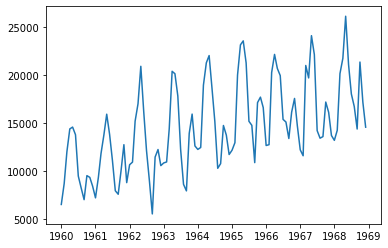

In [5]:
import matplotlib.pyplot as plt
plt.plot(pd1)
plt.show()

(d) Autocorrelation plot: Use Pandas plotting function autocorrelation plot() to create an autocorrelation plot for your series. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

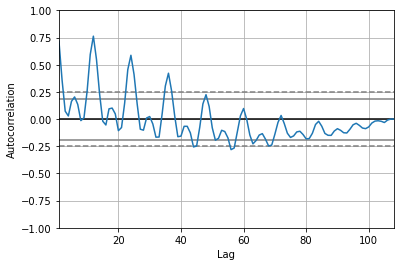

In [6]:
autocorrelation_plot(pd1)

(e) Stationarity in time series data: Use the adfuller() function from the Statsmodels library to perform Dickey-Fuller test to check if your time series is stationary or non-stationary. Interpret the results of the test.

In [7]:
# Augmented Dickey Fuller test
adfuller(pd1)

(-1.223812766175286,
 0.663269104983286,
 12,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 1671.1995896872572)

We see the p-value is greater then 0.05 so the series is non stationary

(f) Automatic time series decomposition: Use seasonal decompose() function from Statsmodels library. Specify your model as ‘additive’ and use the .plot() function to visualize the four resulting series. Interpret the results (Do you observe any trend; if yes, what kind of trend; Is there any seasonality in your data).

In [8]:
X=seasonal_decompose(pd1,period=4)
print(X.seasonal)

Month
1960-01-01   -513.270433
1960-02-01    264.806490
1960-03-01    505.965144
1960-04-01   -257.501202
1960-05-01   -513.270433
                 ...    
1968-08-01   -257.501202
1968-09-01   -513.270433
1968-10-01    264.806490
1968-11-01    505.965144
1968-12-01   -257.501202
Name: seasonal, Length: 108, dtype: float64


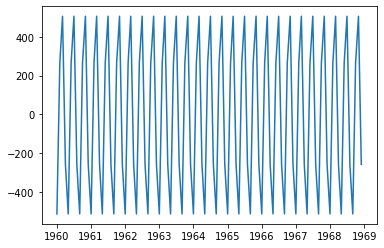

In [9]:
plt.plot(X.seasonal)
plt.show()

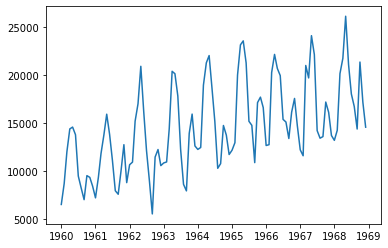

In [10]:
plt.plot(X.observed)
plt.show()

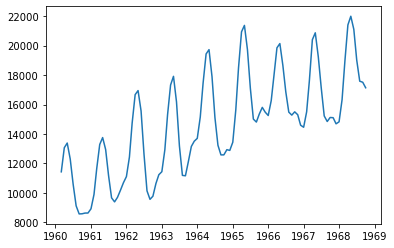

In [11]:
plt.plot(X.trend)
plt.show()

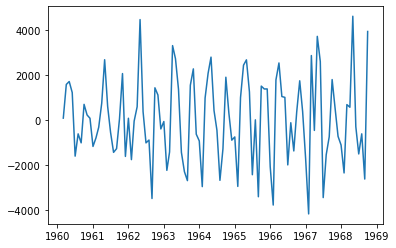

In [12]:
plt.plot(X.resid)
plt.show()

(g) Detrend by model fitting: Use a linear model to detrend your time series data:

i. Use the scikit-learn LinearRegression model to fit a linear model on your data.

ii. Use .predict() function to calculate the trend.

iii. Use .plot() and .show() functions to visualtize the trend and the series data on the same plot.

iv. Deterend your sereis by subtracting the trend values from the original values of the series, and plot the resulting detrented series in a separate plot.

In [13]:
X1=pd3['Month'].values.tolist()
fg=[]
c=1
for y in X1:
    fg.append(c)
    c+=1
pd3['count']=fg
X=pd3['count'].values.tolist()
y=pd3['Sales']
#pd3.head(5)
reg =LinearRegression().fit(np.array(X).reshape(-1,1), y)
reg.score(np.array(X).reshape(-1,1), y)

0.3158854329342885

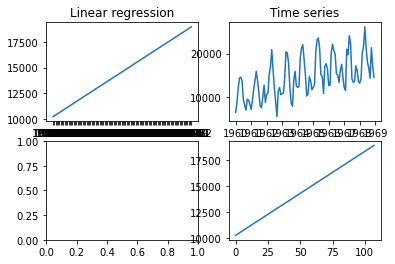

In [14]:
Y2=reg.predict(np.array(X).reshape(-1,1))
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(X1,Y2)
axis[0, 0].set_title("Linear regression")
  
# For Cosine Function
axis[0, 1].plot(pd1)
axis[0, 1].set_title("Time series")
plt.plot(Y2)
plt.show()

ARIMA with Python: To answer the questions for this part, you can take a look at the code from Lab Session 11. (5 points)

i. Extract the NumPy array of data values and split your data into train and test with a split of 70-30.

ii. Use the forecast() function to perform a one-step forecast using the model. Use the train set to fit the model, and generate a prediction for each element on the test set.

iii. Perform a rolling forecast by keeping track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration; Print the prediction and expected value each iteration. To define your ARIMA model for this part use the ARIMA function from Statsmodels library, and pass in the parameters p=5, d=1, q=1.

iv. Calculate a final root mean squared error score (RMSE) for the predictions.

v. Create a line plot to show the expected values (blue) compared to the rolling forecast predictions (red).

In [15]:
import warnings

In [28]:
# split into train and test sets
size = int(len(pd3) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [27]:
pd1.dropna(inplace=True)

In [47]:
# make prdictions
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

LinAlgError: SVD did not converge

In [48]:
import math 
from sklearn.metrics import mean_squared_error

# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: {}".format(rmse))
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [37, 0]

Problem 2: Multilayer Perceptron for Binary Classification (15 points)
In this problem you will create a classification neural network in Keras using the KerasClassifier
wrapper. For this problem, from the zip file you downloaded for homework assignment #5, use
the pima-indians-diabetes dataset. The objective of the dataset is to diagnostically predict whether
or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In
particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets
consists of several medical predictor variables and one target variable. Predictor variables includes
the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

!pip install tensorflow

In [31]:
import numpy as np
import tensorflow as tf
import random as python_random
# fix random seed for reproducibility
def reset_seeds ():
    np.random.seed ( 123 )
    python_random.seed ( 123 )
    tf.random.set_seed ( 1234 )
    reset_seeds ()
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,InputLayer
from keras.wrappers. scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy
from pandas import read_csv
# load the dataset
filename = "Dataset5/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = read_csv ( filename , names = names )
# split into input (X) and output (y) variables
array = dataset . values
X = array [:,0:8]
y = array [:,8]

(a) Define your Keras model

In [32]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(12,input_dim=8 ,activation='relu'))

# Now the model will take as input arrays of shape (None, 16)  
# and output arrays of shape (None, 32).  
# Note that after the first layer, you don't need to specify  
# the size of the input anymore:  
    model.add(tf.keras.layers.Dense(8,activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
#m1=create_model(X,y)
m2=KerasClassifier(build_fn=create_model,epochs=10,batch_size=16,verbose=0) 

C:\Users\SUMAMA~1\AppData\Local\Temp/ipykernel_59700/291242446.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  m2=KerasClassifier(build_fn=create_model,epochs=10,batch_size=16,verbose=0)


In [33]:
print(m2)

(b) Create model using KerasClassifier wrapper class: Wrap your deep learning model using KerasClassifier wrapper:

In [34]:
dict1={'epochs':[20,50,70],'batch_size':[16,32]}
clf = GridSearchCV(m2, dict1,cv=4)
'''
kfold=KFold(n_splits=4)
cv_results=cross_val_score(clf,X,y,cv=kfold,verbose=1)
'''

'\nkfold=KFold(n_splits=4)\ncv_results=cross_val_score(clf,X,y,cv=kfold,verbose=1)\n'

(c) Evaluate model with cross-validation

In [35]:
fg=clf.fit(np.array(X),np.array(y))

In [36]:
for t in fg.cv_results_.keys():
    print(t,fg.cv_results_[t])

mean_fit_time [0.546287   0.97657204 1.24571913 0.35400623 0.5797956  0.83301556]
std_fit_time [0.04970124 0.06568983 0.08453245 0.00267233 0.01904517 0.07985517]
mean_score_time [0.08825666 0.08235198 0.07608241 0.07194698 0.072833   0.07362354]
std_score_time [0.00861939 0.00559923 0.00145848 0.00149754 0.00072484 0.00268758]
param_batch_size [16 16 16 32 32 32]
param_epochs [20 50 70 20 50 70]
params [{'batch_size': 16, 'epochs': 20}, {'batch_size': 16, 'epochs': 50}, {'batch_size': 16, 'epochs': 70}, {'batch_size': 32, 'epochs': 20}, {'batch_size': 32, 'epochs': 50}, {'batch_size': 32, 'epochs': 70}]
split0_test_score [0.640625   0.703125   0.703125   0.60416669 0.66666669 0.69270831]
split1_test_score [0.67708331 0.69791669 0.63541669 0.58333331 0.66666669 0.671875  ]
split2_test_score [0.6875     0.79166669 0.76041669 0.60416669 0.671875   0.76041669]
split3_test_score [0.61458331 0.63541669 0.65104169 0.65625    0.65625    0.66666669]
mean_test_score [0.65494791 0.70703126 0.687

(d) Grid search parameters: Using GridSearchCV class, perform a grid search on the number of epochs [20,50,70], and the batch sizes of [5,10,20].

In [37]:
dict1={'epochs':[20,50,70],'batch_size':[16,32]}
clf = GridSearchCV(m2, dict1)

Problem 3: CNN Model for Photo Classification (15 points)
Define a simple CNN network and evaluate how well it performs on the problem of CIFAR-10 Photo
Classification. CIFAR is an acronym that stands for the Canadian Institute For Advanced Research
and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the
CIFAR institute. The dataset is comprised of 60,000 32×32 pixel color photographs of objects from
10 classes, such as frogs, birds, cats, ships, etc. Part of the code below loads the CIFAR-10 train
and test dataset using the Keras API.

In [38]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# load data
( X_train,y_train),(X_test ,y_test)=cifar10.load_data ()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical ( y_train )
y_test = np_utils.to_categorical ( y_test )
num_classes = y_test.shape [1]

(a) Create the CNN model: Use a structure with two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions. 

(b) Compile the model: Compile your model with an SGD optimizer that uses learning rate schedule

In [39]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Conv2DTranspose, Concatenate,BatchNormalization
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU

def create_model():
    input1 = Input(shape=(32,32,3))
    first_conv = Conv2D(32,(3,3),activation='relu',padding='same')(input1)
    #sec_max=MaxPooling2D((2,2))(first_conv)
    first_conv=(BatchNormalization(momentum=0.8))(first_conv)
    first_conv=Dropout(rate=0.3)(first_conv) # apply 30% dropout to the next layer
    first_conv = Conv2D(32,(3,3),activation='relu',padding='same')(input1)
    #sec_max=MaxPooling2D((2,2))(first_conv)
    first_conv=Dropout(rate=0.3)(first_conv) # apply 30% dropout to the next layer
    first_conv=(BatchNormalization(momentum=0.8))(first_conv)
    sec_max=MaxPooling2D((2,2))(first_conv)
    flat = Flatten()(sec_max)
    dense1=Dense(512,activation='relu')(flat)
    dense2=Dense(10, activation='softmax')(dense1)
    model = Model(inputs=input1, outputs=dense2, name="classify_model")
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    return model
mod1=create_model()

In [40]:
mod1.summary()

Model: "classify_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)           

(c) Fit the model

In [41]:
mod1.fit(np.array(X_train),np.array(y_train),epochs=25,batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4889 - accuracy: 0.4745
Epoch 2/25
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1374 - accuracy: 0.5972
Epoch 3/25
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9582 - accuracy: 0.6645
Epoch 4/25
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8135 - accuracy: 0.7175
Epoch 5/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6830 - accuracy: 0.7607
Epoch 6/25
1563/1563 [==============================] - 48s 30ms/step - loss: 0.5622 - accuracy: 0.8064
Epoch 7/25
1563/1563 [==============================] - 48s 30ms/step - loss: 0.4517 - accuracy: 0.8450
Epoch 8/25
1563/1563 [==============================] - 45s 29ms/step - loss: 0.3550 - accuracy: 0.8807
Epoch 9/25
1563/1563 [==============================] - 46s 29ms/step - loss: 0.2745 - accuracy: 0.9090
Epoch 10/25
1563/1563 [==============================] - 55s 35m

(d) Evaluate the model

In [42]:
x=[1,-1,-1,-1,7]
f=np.array(x)
print(f)
print(np.gradient(f))

[ 1 -1 -1 -1  7]
[-2. -1.  0.  4.  8.]
